<a href="https://colab.research.google.com/github/DushyantKhinchi/DushyantKhinchi-Amazon-Time-Series-Analysis/blob/master/AMZN_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "drive/My Drive/AMZN TSA/"

AMZN.csv  AMZN_monthly.csv  Untitled0.ipynb


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
AMZN=pd.read_csv('drive/My Drive/AMZN TSA/AMZN_monthly.csv')

In [0]:
AMZN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,95.349998,97.430000,68.839996,77.699997,77.699997,288335400
1,2008-02-01,79.019997,79.400002,63.970001,64.470001,64.470001,211217800
2,2008-03-01,63.590000,76.930000,61.200001,71.300003,71.300003,192685600
3,2008-04-01,72.989998,82.639999,70.650002,78.629997,78.629997,197849400
4,2008-05-01,78.400002,84.750000,71.559998,81.620003,81.620003,152573200
...,...,...,...,...,...,...,...
138,2019-07-01,1922.979980,2035.800049,1849.439941,1866.780029,1866.780029,73177400
139,2019-08-01,1871.719971,1897.920044,1743.510010,1776.290039,1776.290039,79771200
140,2019-09-01,1770.000000,1853.660034,1709.219971,1735.910034,1735.910034,61172900
141,2019-10-01,1746.000000,1798.849976,1685.060059,1776.660034,1776.660034,70360500


In [0]:
AMZN=AMZN[['Date', 'Close']]
AMZN

,Date,Close
0,2008-01-01,77.699997
1,2008-02-01,64.470001
2,2008-03-01,71.300003
3,2008-04-01,78.629997
4,2008-05-01,81.620003
...,...,...
138,2019-07-01,1866.780029
139,2019-08-01,1776.290039
140,2019-09-01,1735.910034
141,2019-10-01,1776.660034


In [0]:
from datetime import datetime
AMZN['Date']=pd.to_datetime(AMZN['Date'], infer_datetime_format=True)
AMZN=AMZN.set_index(['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
AMZN

,Close
Date,
2008-01-01,77.699997
2008-02-01,64.470001
2008-03-01,71.300003
2008-04-01,78.629997
2008-05-01,81.620003
...,...
2019-07-01,1866.780029
2019-08-01,1776.290039
2019-09-01,1735.910034


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Closing Price')

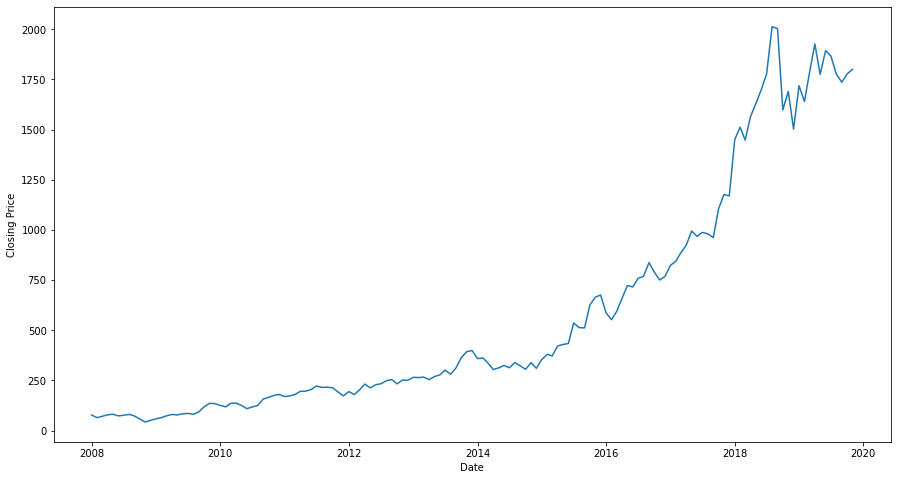

In [0]:
#Testing for stationarity
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 8),facecolor='w', edgecolor='k')
plt.plot(AMZN)
plt.xlabel('Date')
plt.ylabel('Closing Price')

In [0]:
#Rolling Statistics
rolling_mean=AMZN.rolling(window=12).mean()
rolling_std=AMZN.rolling(window=12).std()

In [0]:
print(rolling_mean, rolling_std)

                  Close
Date                   
2008-01-01          NaN
2008-02-01          NaN
2008-03-01          NaN
2008-04-01          NaN
2008-05-01          NaN
...                 ...
2019-07-01  1783.930827
2019-08-01  1764.229167
2019-09-01  1741.971669
2019-10-01  1756.859171
2019-11-01  1766.078339

[143 rows x 1 columns]                  Close
Date                  
2008-01-01         NaN
2008-02-01         NaN
2008-03-01         NaN
2008-04-01         NaN
2008-05-01         NaN
...                ...
2019-07-01  161.674526
2019-08-01  144.783789
2019-09-01  123.741486
2019-10-01  115.305988
2019-11-01  113.903318

[143 rows x 1 columns]


Text(0, 0.5, 'Closing Price')

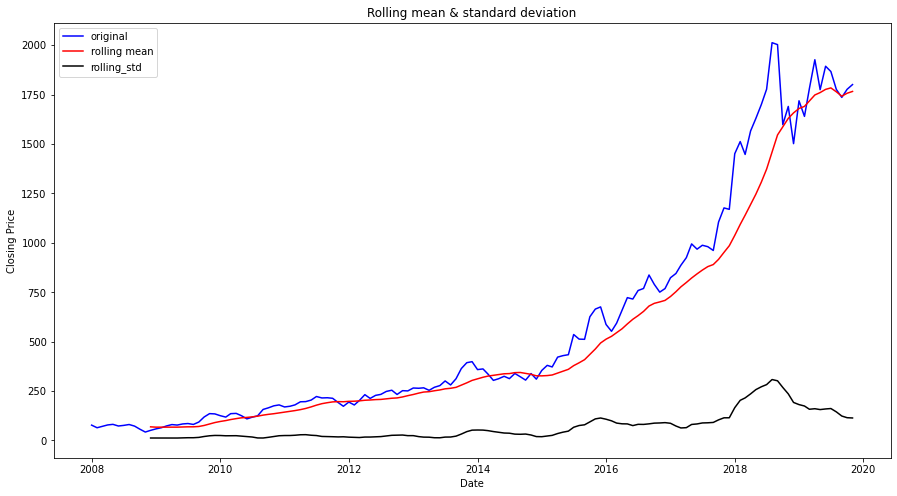

In [0]:
figure(num=None, figsize=(15, 8),facecolor='w', edgecolor='k')
plt.plot(AMZN, color='blue', label='original')
plt.plot(rolling_mean, color='red', label='rolling mean')
plt.plot(rolling_std, color='black', label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling mean & standard deviation')
# plt.show(block=False)
plt.xlabel('Date')
plt.ylabel('Closing Price')

In [0]:
#Dicky fuller test
from statsmodels.tsa.stattools import adfuller

dftest=adfuller(AMZN['Close'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test-statistic','P-value','# Lags used','Number of observations used'])

for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# Ho:Null-Hypothesis: Time series is non-stationary, Ha:Alternate-hypothesis: Time series is stationary
#p-value>0.05 can't reject Ho for Ha
# Also, Test-statistic = 1.14 which is greater than the Critical Value(5%) of -2.86 so, can't reject Ho for Ha

Test-statistic                   0.874940
P-value                          0.992754
# Lags used                      7.000000
Number of observations used    135.000000
Critical Value (1%)             -3.479743
Critical Value (5%)             -2.883198
Critical Value (10%)            -2.578320
dtype: float64


Methods to convert a non-stationary time series to a stationary time series

1. transforming your data using square roots. You have already tried the LN transformation maybe (it depends on your series) you can obtain a stationary time series by considering the square roots transformation.
2. detrending or de-seasonalizing your data. If you can eliminate the trend or the seasonality hopefully you can obtain a stationary time series.
3. differencing two times your series or more..
4. considering eventual other problems like outliers (I assume you have already considered the problem but maybe they can be a possibility to take in to account).
In general you have to consider at the same time points in your model construction like structural changes. I think for an ARIMA model it is necessary to take in to account not too many observation (parameter drift could be frequent) and surely eventual breaks.
In general differencing a time series could be not enough in order to obtain a stationary time series.

# Differencing

In [0]:
#Differencing

AMZN_diff=AMZN['Close']-AMZN['Close'].shift(1)
AMZN_diff.dropna(inplace=True)
AMZN_diff.drop(AMZN_diff.tail(1).index,inplace=True)
AMZN_diff=AMZN_diff.to_frame()
AMZN_diff.index.names = ['Date']
AMZN_diff

,Close
Date,
2008-02-01,-13.229996
2008-03-01,6.830002
2008-04-01,7.329994
2008-05-01,2.990006
2008-06-01,-8.290001
...,...
2019-06-01,118.560059
2019-07-01,-26.849976
2019-08-01,-90.489990


In [0]:

#Dicky Fuller test after differencing
dftest=adfuller(AMZN_diff['Close'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test-statistic','P-value','# Lags used','Number of observations used'])

for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

#p-value<0.05, reject Ho for Ha
# Also, Test-statistic = -10.35 which is lesser than the Critical Value(5%) of -2.86 so, we can reject Ho for Ha
#Series has now become stationary

Test-statistic                  -3.868822
P-value                          0.002277
# Lags used                      6.000000
Number of observations used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


Text(0, 0.5, 'log(Closing Price)')

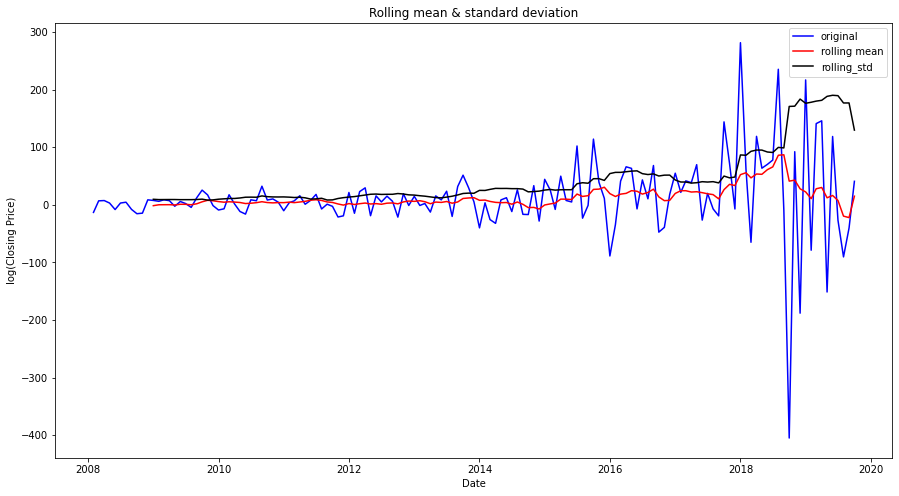

In [0]:
#Rolling Statistics after differencing
rolling_mean=AMZN_diff.rolling(window=12).mean()
rolling_std=AMZN_diff.rolling(window=12).std()

figure(num=None, figsize=(15, 8),facecolor='w', edgecolor='k')
plt.plot(AMZN_diff, color='blue', label='original')
plt.plot(rolling_mean, color='red', label='rolling mean')
plt.plot(rolling_std, color='black', label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling mean & standard deviation')
# plt.show(block=False)
plt.xlabel('Date')
plt.ylabel('log(Closing Price)')

#Log transformation

Text(0, 0.5, 'log(Closing Price)')

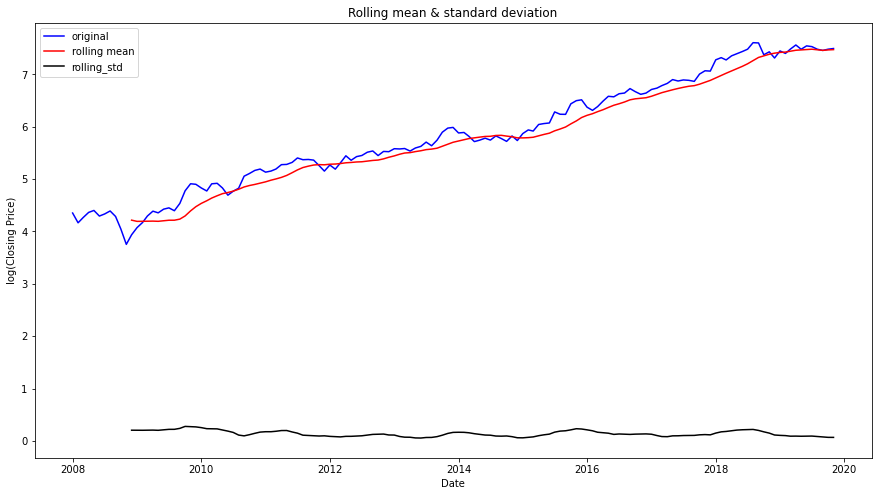

In [0]:
#Log transformation for stationarity
AMZN_log=np.log(AMZN)

#Rolling Statistics on log-scale
rolling_mean_log=AMZN_log.rolling(window=12).mean()
rolling_std_log=AMZN_log.rolling(window=12).std()

figure(num=None, figsize=(15, 8),facecolor='w', edgecolor='k')
plt.plot(AMZN_log, color='blue', label='original')
plt.plot(rolling_mean_log, color='red', label='rolling mean')
plt.plot(rolling_std_log, color='black', label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling mean & standard deviation')
# plt.show(block=False)
plt.xlabel('Date')
plt.ylabel('log(Closing Price)')

In [0]:
#Dicky Fuller test after differencing
dftest=adfuller(AMZN_log['Close'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test-statistic','P-value','# Lags used','Number of observations used'])

for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)
#Log transformation didn't help in achieving stationarity

Test-statistic                  -0.300746
P-value                          0.925399
# Lags used                      0.000000
Number of observations used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


In [0]:
#Differencing after log transformation
#Subtracting moving average value from log scsale value
AMZN_log['Close']=AMZN_log['Close']-rolling_mean_log['Close']
AMZN_log.dropna(inplace=True)

In [0]:
AMZN_log['Close']=AMZN_log['Close'].apply(pd.to_numeric, errors='coerce')

In [0]:
dftest=adfuller(AMZN_log['Close'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test-statistic','P-value','# Lags used','Number of observations used'])

for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)
#stationarity achieved

Test-statistic                  -4.378867
P-value                          0.000323
# Lags used                      0.000000
Number of observations used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


Text(0, 0.5, 'log(Closing Price)')

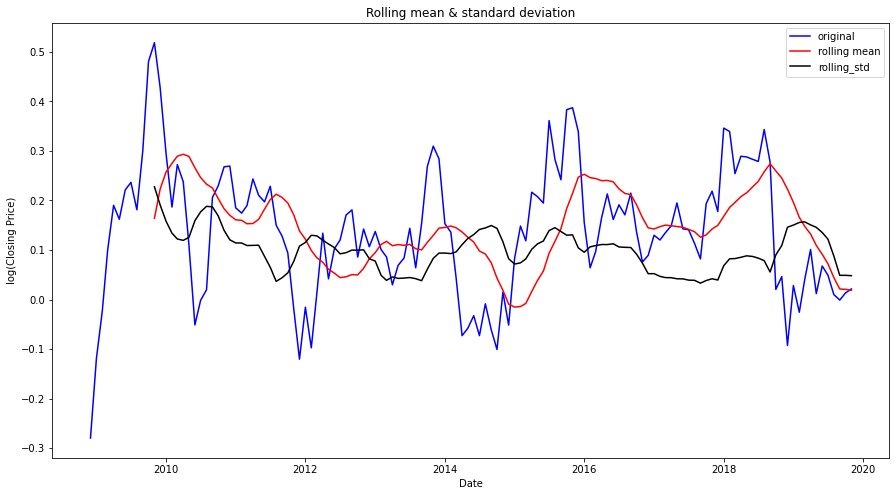

In [0]:
#Rolling Statistics on log-scale
rolling_mean_log=AMZN_log.rolling(window=12).mean()
rolling_std_log=AMZN_log.rolling(window=12).std()

figure(num=None, figsize=(15, 8),facecolor='w', edgecolor='k')
plt.plot(AMZN_log, color='blue', label='original')
plt.plot(rolling_mean_log, color='red', label='rolling mean')
plt.plot(rolling_std_log, color='black', label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling mean & standard deviation')
# plt.show(block=False)
plt.xlabel('Date')
plt.ylabel('log(Closing Price)')

# ARIMA

In [0]:
AMZN_diff

,Close
Date,
2008-02-01,-13.229996
2008-03-01,6.830002
2008-04-01,7.329994
2008-05-01,2.990006
2008-06-01,-8.290001
...,...
2019-06-01,118.560059
2019-07-01,-26.849976
2019-08-01,-90.489990


<Figure size 1080x576 with 0 Axes>

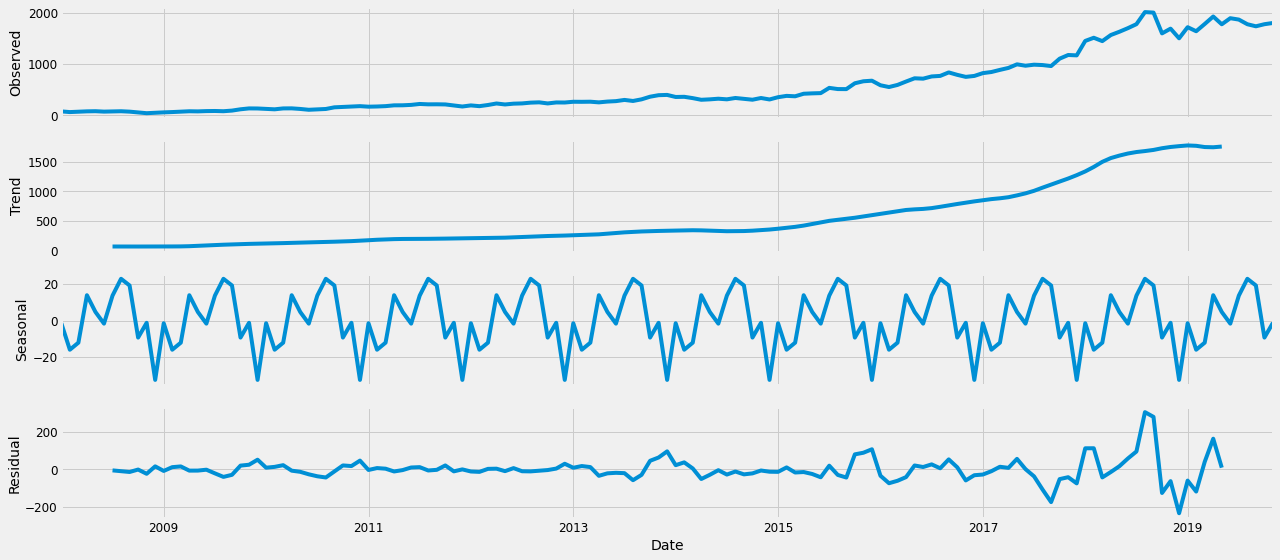

In [0]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(AMZN, model='additive', freq=12)

figure(num=None, figsize=(15, 8),facecolor='w', edgecolor='k')
decomposition.plot()
plt.show()

Text(0.5, 1.0, 'Partial Autocorrelation Function')

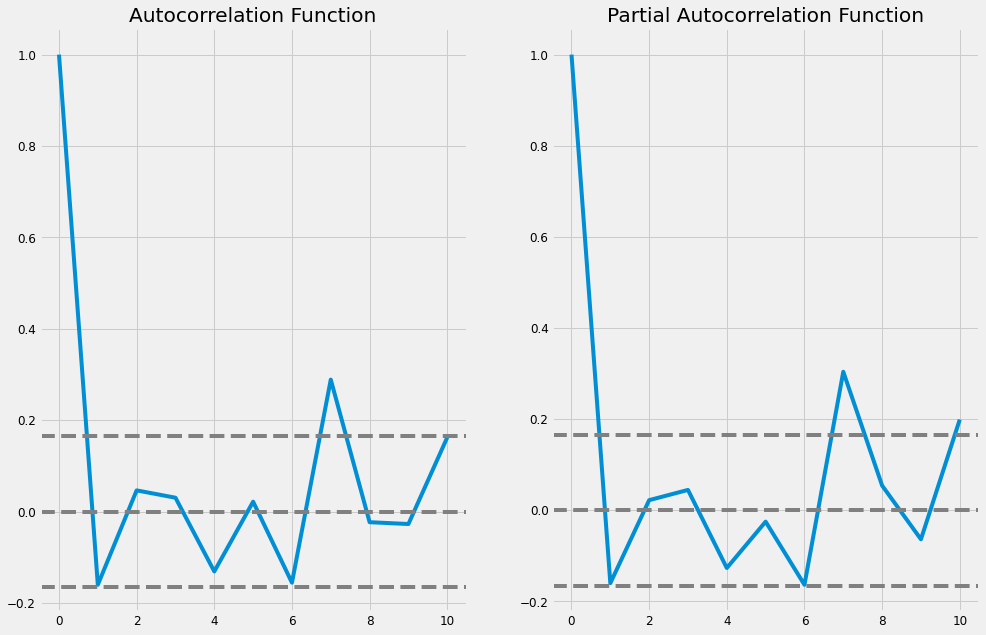

In [0]:


from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.rcParams['axes.facecolor'] = 'white'
plt.style.use('fivethirtyeight')

#ACF & PACF plots

lag_acf = acf(AMZN_diff, nlags=10)
lag_pacf = pacf(AMZN_diff, nlags=10, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(AMZN_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(AMZN_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(AMZN_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(AMZN_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
# figure(num=None, figsize=(15, 8),facecolor='w', edgecolor='k')

# Can also us from pandas.tools.plotting import autocorrelation_plot
          

Plotting AR model


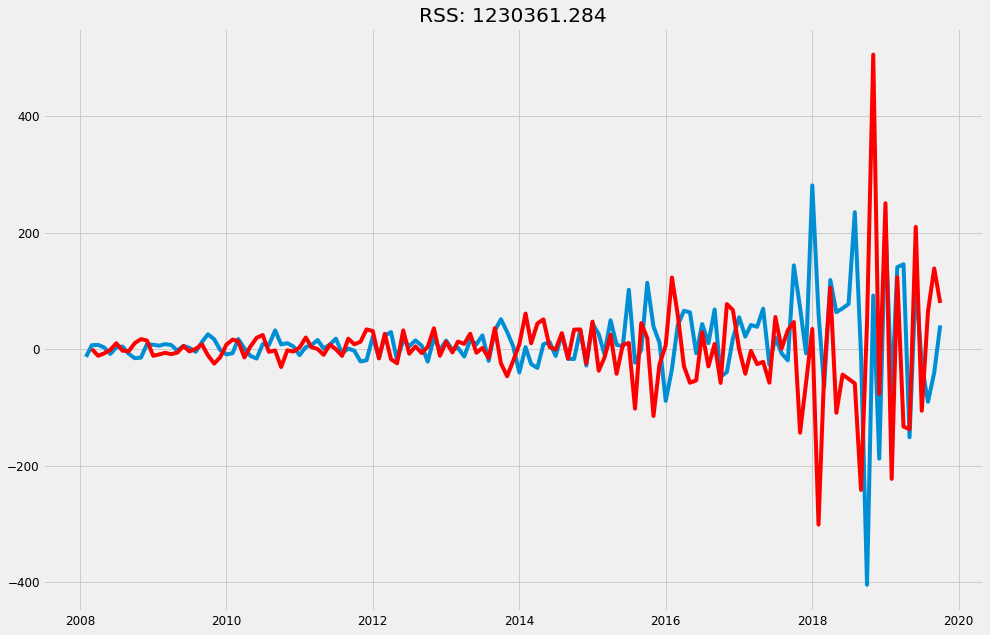

In [0]:
#From ACF & PACF graph above: p=1, q=1

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
model_ARIMA = ARIMA(AMZN_diff, order=(1,1,1))
results_ARIMA = model_ARIMA.fit(disp=-1)
plt.plot(AMZN_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
results_ARIMA.fittedvalues
plt.title('RSS: %.3f'%sum((results_ARIMA.fittedvalues - AMZN_diff['Close'][1:])**2))
print('Plotting AR model')

In [0]:
print(results_ARIMA.summary().tables[1])

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2190      0.115      1.900      0.060      -0.007       0.445
ar.L1.D.Close    -0.1731      0.083     -2.084      0.039      -0.336      -0.010
ma.L1.D.Close    -1.0000      0.020    -48.979      0.000      -1.040      -0.960


In [0]:
import statsmodels.api as sm

#SARIMAX
model_SARIMAX = sm.tsa.statespace.SARIMAX(AMZN_diff,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model_SARIMAX.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2050      0.080     -2.564      0.010      -0.362      -0.048
ma.L1         -1.0000     20.150     -0.050      0.960     -40.493      38.493
ar.S.L12      -0.7773      0.125     -6.215      0.000      -1.022      -0.532
ma.S.L12      -6.0430      5.597     -1.080      0.280     -17.013       4.927
sigma2       149.0187   2924.974      0.051      0.959   -5583.825    5881.863


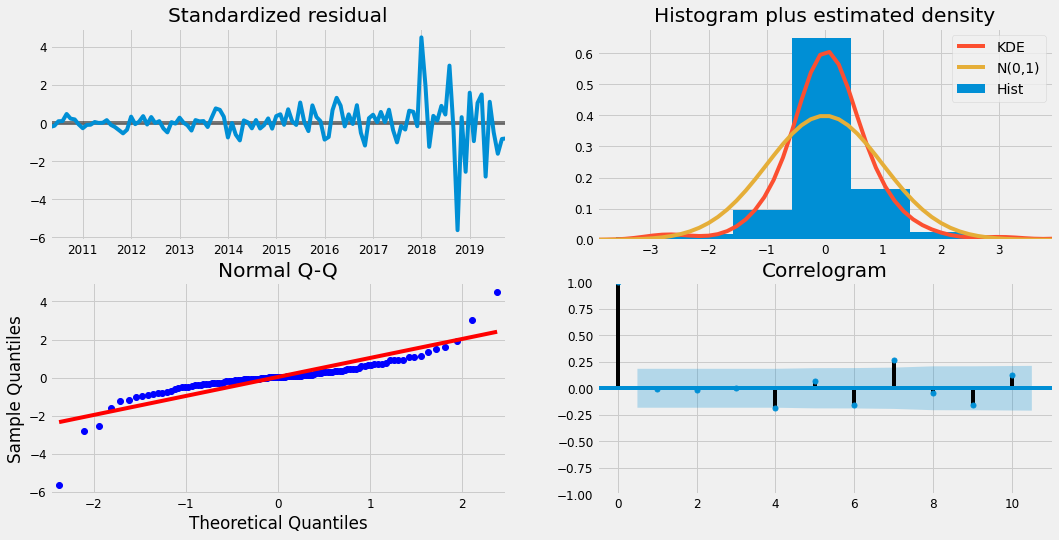

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

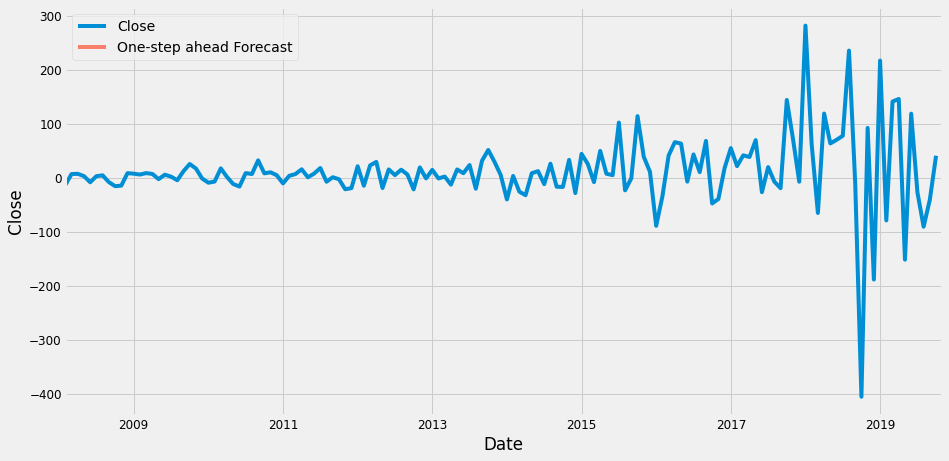

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = AMZN_diff['2008':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

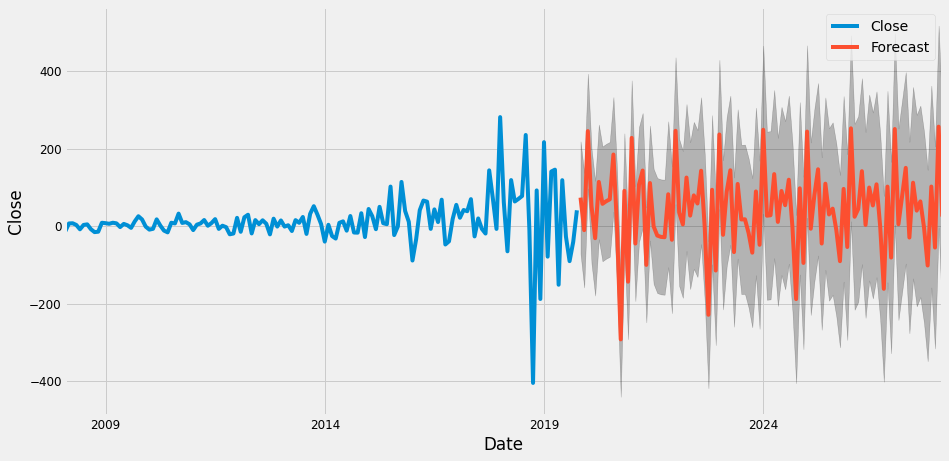

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = AMZN_diff.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()